In [23]:
import matplotlib.pyplot as plt
import numpy as np
import polars as pl
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


dataset = fetch_california_housing()

In [2]:
print(dataset.DESCR)


.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [3]:
df_exp = pl.DataFrame(dataset.data, dataset.feature_names)
df_tgt = pl.DataFrame(dataset.target, ["HousingPrices"])

df_total = pl.concat([df_exp, df_tgt], how="horizontal")
df_total.head()

<Axes: >

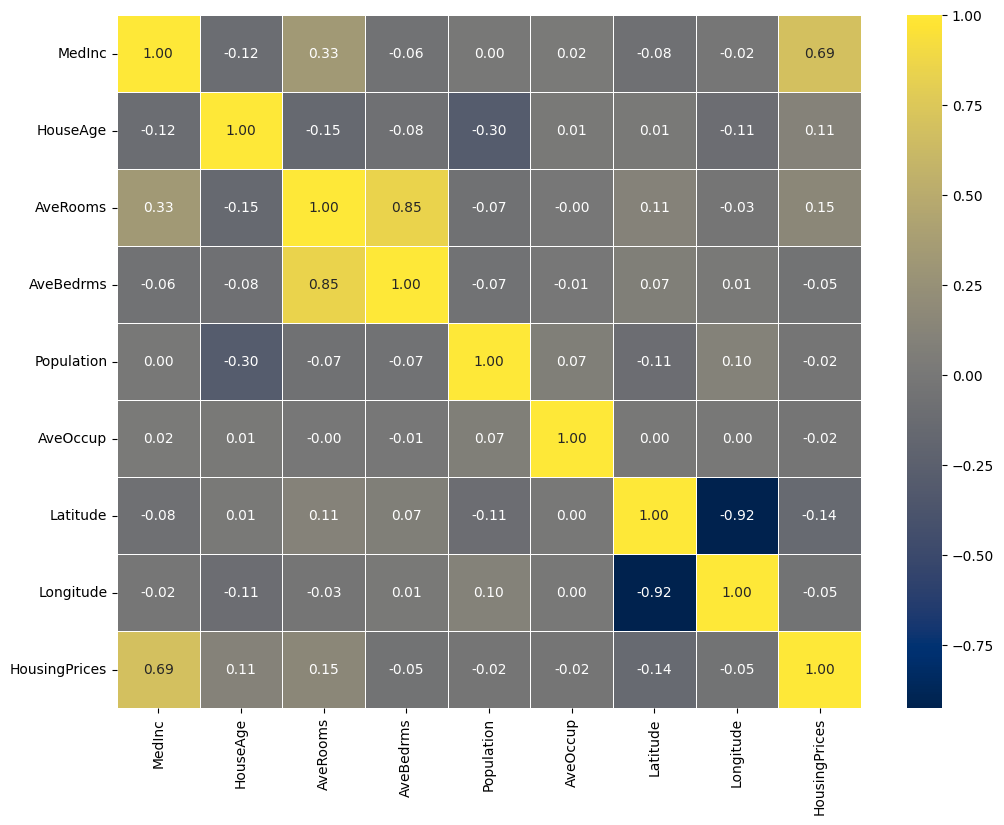

In [6]:
plt.figure(figsize=(12, 9))
sns.heatmap(df_total.to_pandas().corr(), annot=True, cmap="cividis", fmt=".2f", linewidths=0.5, )

statistic,MedInc,HousingPrices
str,f64,f64
"""count""",20640.0,20640.0
"""null_count""",0.0,0.0
"""mean""",3.870671,2.068558
"""std""",1.899822,1.153956
"""min""",0.4999,0.14999
"""25%""",2.5637,1.196
"""50%""",3.5349,1.797
"""75%""",4.7431,2.647
"""max""",15.0001,5.00001


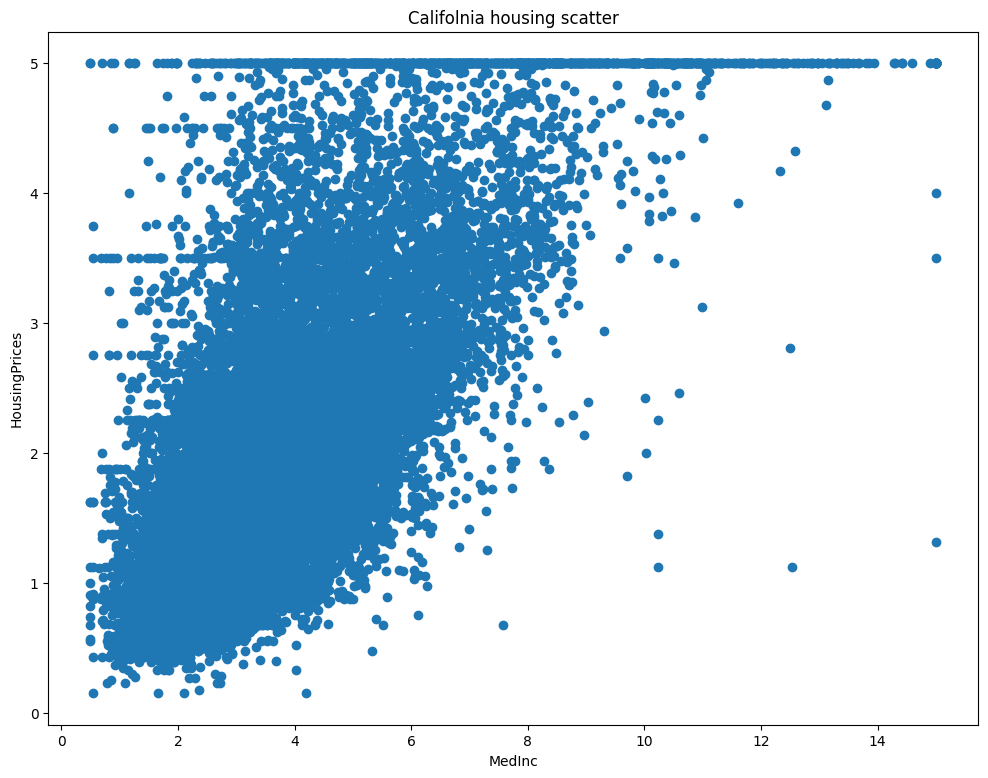

In [7]:
col_exp_var = "MedInc"
col_tgt_var = "HousingPrices"

fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot()
ax.scatter(df_total.select(col_exp_var), df_total.select(col_tgt_var))
ax.set_xlabel(col_exp_var)
ax.set_ylabel(col_tgt_var)
ax.set_title("Califolnia housing scatter")
df_total.select([col_exp_var, col_tgt_var]).describe()

95%点の分位数:  shape: (1, 1)
┌────────┐
│ MedInc │
│ ---    │
│ f64    │
╞════════╡
│ 7.3003 │
└────────┘


statistic,MedInc,HousingPrices
str,f64,f64
"""count""",19607.0,19607.0
"""null_count""",0.0,0.0
"""mean""",3.585493,1.947208
"""std""",1.400814,1.035481
"""min""",0.4999,0.14999
"""25%""",2.52,1.164
"""50%""",3.425,1.734
"""75%""",4.5208,2.479
"""max""",7.2988,5.00001


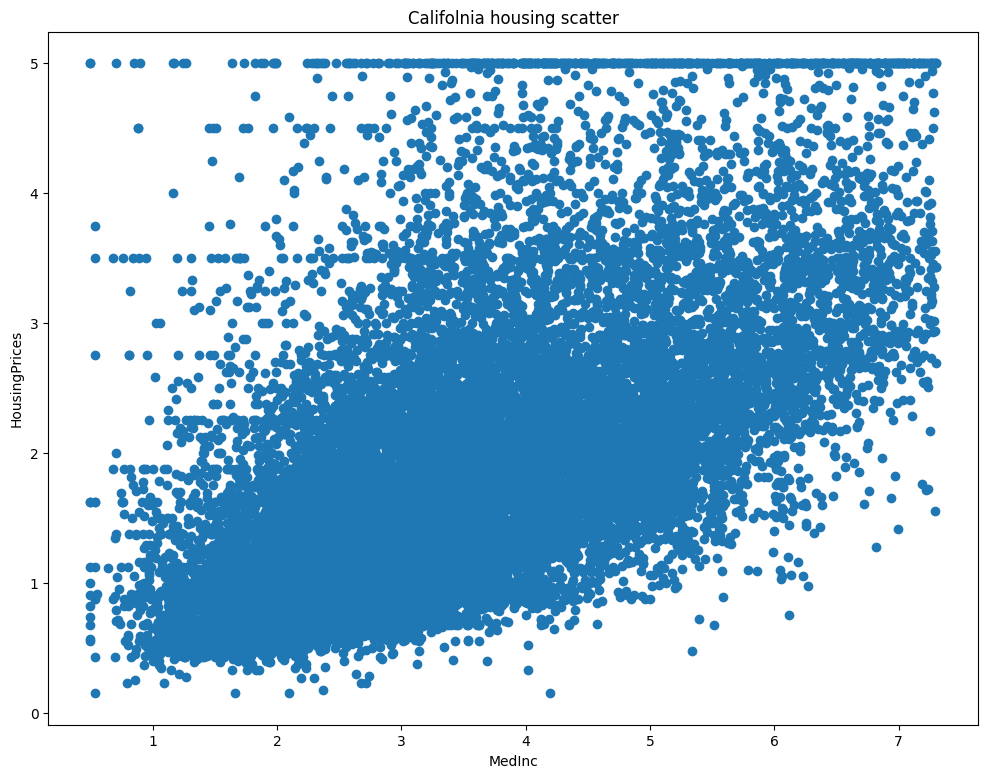

In [12]:
q_95 = df_total.select(col_exp_var).quantile(0.95)
df_total_prc = df_total.filter(pl.col(col_exp_var) < q_95)
print("95%点の分位数: ", q_95)


fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot()
ax.scatter(df_total_prc.select(col_exp_var), df_total_prc.select(col_tgt_var))
ax.set_xlabel(col_exp_var)
ax.set_ylabel(col_tgt_var)
ax.set_title("Califolnia housing scatter")
df_total_prc.select([col_exp_var, col_tgt_var]).describe()

In [14]:
XY = df_total_prc.select([col_exp_var, col_tgt_var]).to_numpy()
train_ds, test_ds = train_test_split(XY, test_size=0.3, random_state=42)

In [18]:
simple_lr = LinearRegression()
simple_lr.fit(train_ds[:, 0].reshape(-1, 1), train_ds[:, 1])

LinearRegression()

In [39]:
b = simple_lr.intercept_
a = simple_lr.coef_[0]
r2 = simple_lr.score(train_ds[:, 0].reshape(-1, 1), train_ds[:, 1])

print("Intercept: ", b)
print("Regression Coefficient: ", a)
print("Coefficient of determination: ", r2)
print("Regression Line: ", f"y = {a}x + {b}")

Intercept:  0.3600232294252812
Regression Coefficient:  0.4418298361920202
Coefficient of determination:  0.3593195777652609
Regression Line:  y = 0.4418298361920202x + 0.3600232294252812


In [31]:
test_ds[:, 0].shape, test_ds[:, 1].shape,

((5883,), (5883,))

Text(0, 0, '$R^2=0.359$')

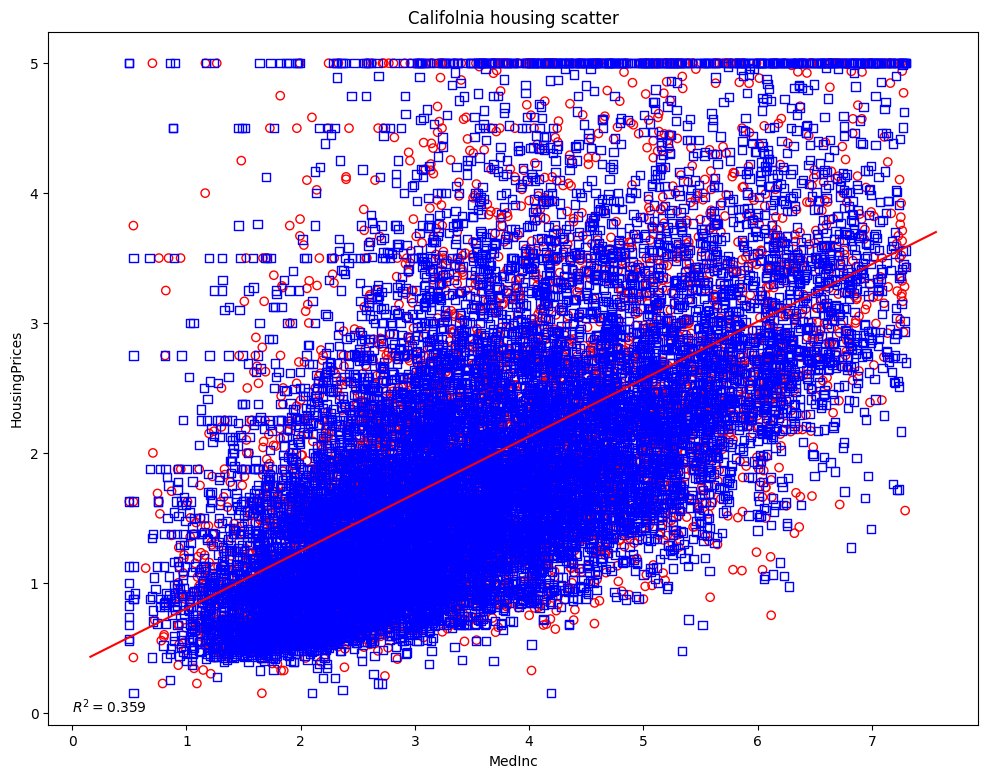

In [40]:
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot()
ax.scatter(test_ds[:, 0], test_ds[:, 1], marker="o", facecolor="None", edgecolors="red")
ax.scatter(train_ds[:, 0], train_ds[:, 1], marker="s", facecolor="None", edgecolors="blue")
ax.set_xlabel(col_exp_var)
ax.set_ylabel(col_tgt_var)
ax.set_title("Califolnia housing scatter")
df_total_prc.select([col_exp_var, col_tgt_var]).describe()
x_range = ax.get_xlim()

reg_line = a * np.arange(x_range[0], x_range[1], 0.1) + b

ax.plot(np.arange(x_range[0], x_range[1], 0.1), reg_line, color="red")

ax.text(0, 0, f"$R^2={r2:0.3f}$")

